In [79]:
import pandas as pd
import numpy as np
import json

In [2]:
df1 = pd.read_excel('Data/bank.xlsx')

In [3]:
list1 = df1['Account No'].unique()

In [4]:
list1

array(["409000611074'", "409000493201'", "409000425051'", "409000405747'",
       "409000438611'", "409000493210'", "409000438620'", "1196711'",
       "1196428'", "409000362497'"], dtype=object)

In [5]:
list2=[]
for i in list1:
    i = i[:-1]
    list2.append(i)

In [6]:
account_dict = {}

for i in list1:
    account_dict[i] = i[:-1]

In [7]:
df1["Account No"] = df1["Account No"].map(account_dict)

In [8]:
df1.head(1)

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.


In [9]:
def account(accno):
    dfnew = df1[df1['Account No']==accno]
    return dfnew

retrdf = account(list2[8])
dfwithdrawl = retrdf.dropna(axis=0, subset=['WITHDRAWAL AMT']) 

dfdeposit = retrdf.dropna(axis=0, subset=['DEPOSIT AMT']) 

lwith = dfwithdrawl['TRANSACTION DETAILS'].unique()

newlist=[]

for y in lwith:
    newlist.append(y[0:4])

(NEFTcnt,RTGScnt,CHQ,DSB) = (0,0,0,0)

for k in newlist:
    if k=='NEFT':
        NEFTcnt+=1
    if k=='RTGS':
        RTGScnt+=1
    if k=='CHQ ':
        CHQ+=1
    if k=='DSB ':
        DSB+=1

print(NEFTcnt,RTGScnt,CHQ,DSB)

80 347 281 204


In [10]:
df1['Bank_Name']=np.nan
df1['Transaction_Mode']=np.nan

In [11]:
df1.head(2)

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,Bank_Name,Transaction_Mode
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.,NaN,NaN
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.,NaN,NaN


In [12]:
for k in df1.index:
    str1 = str(df1.iloc[k,2])
    if str1.find('NEFT')>=0:
        print(df1.iloc[k,2],df1.iloc[k,1],df1.iloc[k,3],df1.iloc[k,4])
    else:
        pass

NEFT/FDRL666621043/ONE 97 2017-09-25 00:00:00 nan 2017-09-25 00:00:00
NEFT/SBIN316054519453/Mr 2016-02-23 00:00:00 nan 2016-02-23 00:00:00
NEFT/SBIN316054795331/Mr 2016-02-23 00:00:00 nan 2016-02-23 00:00:00
NEFT/SD1279001248/DHARAMB 2016-02-29 00:00:00 nan 2016-02-29 00:00:00
NEFT/SBIN116062424445/DEE 2016-03-02 00:00:00 nan 2016-03-02 00:00:00
NEFT/MAHBH16090571628/M/s 2016-03-30 00:00:00 nan 2016-03-30 00:00:00
NEFT/SD1290309312/VIDYART 2016-04-06 00:00:00 nan 2016-04-06 00:00:00
NEFT/BARBH16098696964/MOT 2016-04-07 00:00:00 nan 2016-04-07 00:00:00
NEFT/SAA33261155/SANJEET 2016-04-08 00:00:00 nan 2016-04-08 00:00:00
NEFT/BKIDN16104834588/KAV 2016-04-13 00:00:00 nan 2016-04-13 00:00:00
NEFT/CBINH16107289293/M S 2016-04-16 00:00:00 nan 2016-04-16 00:00:00
NEFT/BKIDN16111600591/KRI 2016-04-20 00:00:00 nan 2016-04-20 00:00:00
NEFT/STBP916112924171/UNI 2016-04-21 00:00:00 nan 2016-04-21 00:00:00
NEFT/SD1293975857/JAI RAM 2016-04-25 00:00:00 nan 2016-04-25 00:00:00
NEFT/SBIN116116210635/P

In [13]:
all_transactions = list(df1["TRANSACTION DETAILS"])


transac_str = ""

for i, x in enumerate(all_transactions):            
    transac_str += str(x)
    transac_str += " "
    

In [14]:
transac_list = transac_str.replace("/", " ").split()
transac_list2 = []
for x in transac_list:
    if len(x) > 2:
        transac_list2.append(x)

from collections import Counter
cnt = Counter(transac_list2)
max_transac = cnt.most_common(200)

In [15]:
df2 = pd.DataFrame(columns=['Keys','Values'])

In [16]:
newlist=[]
index=0
for y in max_transac:
    newlist.append(y[0])
    df2.loc[index]=[y[0],1]
    index+=1

In [17]:
with open('Data/result.json','r+') as rf:
    dict1=json.loads(rf.read())

In [18]:
df1.drop(['Bank_Name','Transaction_Mode'],axis=1,inplace=True)

In [19]:
df1.drop(['.'],axis=1,inplace=True)

In [20]:
(df1['A'],df1['B'],df1['C'],df1['D'])=(np.nan,np.nan,np.nan,np.nan)

In [21]:
str(df1.iloc[0,2]).split()

['TRF', 'FROM', 'Indiaforensic', 'SERVICES']

In [22]:
'FDRL'.lower() in dict1.keys()

True

In [23]:
dict1

{'indiaforensic': 'A',
 'cashdep': 'B',
 'fdrl': 'A',
 'internal': 'C',
 'neft': 'B',
 'imps': 'B',
 'indfor': 'A',
 'rtgs': 'B',
 'national': 'C',
 'electronic': 'B',
 'aeps': 'B',
 'nfs': 'B',
 'chq': 'B',
 'rupay': 'B',
 'npci': 'A',
 'cash': 'B',
 'pos': 'B',
 'income': 'D',
 'visa': 'B',
 'atm': 'B',
 'gst': 'D',
 'dsb': 'A',
 'sweep': 'B',
 'sbi': 'A',
 'payu': 'B',
 'csh': 'B',
 'bbps': 'B',
 'stl': 'B',
 'master': 'B',
 'tax': 'D',
 'oxygen': 'A',
 'fee': 'D',
 'charges': 'D',
 'maestro': 'B',
 'e-billing': 'B',
 'online': 'B',
 'dom': 'D',
 'hdfc': 'A',
 'net': 'D',
 'epayment': 'B',
 'loan': 'C',
 'cess': 'D'}

In [24]:
df=df1[df1['TRANSACTION DETAILS'].str.contains("FDRL",regex=False,case=False,na=False)]

In [28]:
newdf = pd.read_csv('/Users/atul_shyamanur/Downloads/bank-statement-analysis-master/Data/bank3.csv')

In [29]:
#newdf.drop(['Unnamed: 0'],axis=1,inplace=True)
newdf[newdf['E']=='direct']

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,A,B,C,D,E
2158,409000425051,2016-05-16,613713337971,NaN,2016-05-16,NaN,5000.0,9.685776e+05,0.0,0.0,0.0,0.0,direct
2159,409000425051,2016-05-16,613713338611,NaN,2016-05-16,NaN,5000.0,9.735776e+05,0.0,0.0,0.0,0.0,direct
2160,409000425051,2016-05-16,613713339113,NaN,2016-05-16,NaN,5000.0,9.785776e+05,0.0,0.0,0.0,0.0,direct
2161,409000425051,2016-05-16,613713339816,NaN,2016-05-16,NaN,5000.0,9.835776e+05,0.0,0.0,0.0,0.0,direct
2163,409000425051,2016-05-17,613812435955,NaN,2016-05-17,NaN,1000.0,1.005578e+06,0.0,0.0,0.0,0.0,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108825,409000362497,2017-11-06,731022807904,NaN,2017-11-06,NaN,200000.0,-1.887884e+09,0.0,0.0,0.0,0.0,direct
110120,409000362497,2017-12-31,409000362497:Int.Coll:01-,NaN,2017-12-31,2127.94,NaN,-1.897864e+09,0.0,0.0,0.0,0.0,direct
111204,409000362497,2018-02-28,409000362497:Int.Coll:01-,NaN,2018-02-28,1097.34,NaN,-1.861950e+09,0.0,0.0,0.0,0.0,direct
112102,409000362497,2018-04-30,409000362497:Int.Coll:01-,NaN,2018-04-30,187076.12,NaN,-1.897076e+09,0.0,0.0,0.0,0.0,direct


In [30]:
(la,lb,lc,ld,le) = ([],[],[],[],[])
for u in dict1:
    if dict1[u]=='A':
        la.append(u)
    elif dict1[u]=='B':
        lb.append(u)
    elif dict1[u]=='C':
        lc.append(u)
    elif dict1[u]=='D':
        ld.append(u)
    else:
        pass

In [31]:
print(la)
print(lb)
print(lc)
print(ld)

['indiaforensic', 'fdrl', 'indfor', 'npci', 'dsb', 'sbi', 'oxygen', 'hdfc']
['cashdep', 'neft', 'imps', 'rtgs', 'electronic', 'aeps', 'nfs', 'chq', 'rupay', 'cash', 'pos', 'visa', 'atm', 'sweep', 'payu', 'csh', 'bbps', 'stl', 'master', 'maestro', 'e-billing', 'online', 'epayment']
['internal', 'national', 'loan']
['income', 'gst', 'tax', 'fee', 'charges', 'dom', 'net', 'cess']


In [32]:
newdf['DEPOSIT AMT'].fillna(0,inplace=True)
newdf['WITHDRAWAL AMT'].fillna(0,inplace=True)
Master_Summary = pd.DataFrame(columns=['BANK/FIRM_NAME','TOTAL_DEPOSIT','TOTAL_WITHDRAWL'])

column=[]
column.append('AccountNo')
column[1:] = lb[:]
column.append('Bank/Firm_Name')
column.append('Total Withdrawl')
column.append('Total Deposit')

Summary = pd.DataFrame(columns=column)

Summary['AccountNo']=list2

Summary.set_index(['AccountNo'],inplace=True)

In [33]:
#for x in la:
#if (x is 'indiaforensic') or (x is 'indfor'):
sum_forensic = newdf[(newdf['A']=='indiaforensic') | (newdf['A']=='indfor')]

sum_withdrawl = sum(sum_forensic['WITHDRAWAL AMT'])
sum_Deposit = sum(sum_forensic['DEPOSIT AMT'])



def set_values(x,sw,sd):
    for ele in Summary.columns:
        dfk=(sum_forensic[(sum_forensic['B']==ele) & (sum_forensic['Account No'] == int(x))])
        Summary[ele][x]=len(dfk.index)
        Summary['Bank/Firm_Name']='indiaforensic'
        sw += sum(dfk['WITHDRAWAL AMT'])
        sd += sum(dfk['DEPOSIT AMT'])
    return sw,sd
        
for m in Summary.index:
    sw=0
    sd=0
    sw,sd=set_values(m,sw,sd)
    Summary['Total Withdrawl'][m]=sw
    Summary['Total Deposit'][m]=sd
    
Master_Summary.loc[0] = ['Indiaforensic',sum_Deposit,sum_withdrawl]
Summary.to_csv('Summary.csv', mode='a', header=True)

In [35]:
def create_summary(ll,i):
    sum_forensic = newdf[(newdf['A']==ll)]

    sum_withdrawl = sum(sum_forensic['WITHDRAWAL AMT'])
    sum_Deposit = sum(sum_forensic['DEPOSIT AMT'])

    Master_Summary.loc[i] = [ll,sum_Deposit,sum_withdrawl]

    def set_values(x,sw,sd):
        for ele in Summary.columns:
            dfk=(sum_forensic[(sum_forensic['B']==ele) & (sum_forensic['Account No'] == int(x))])
            Summary[ele][x]=len(dfk.index)
            Summary['Bank/Firm_Name']=ll
            if(ele=="imps"):
                print(len(dfk.index))
                print(dfk)
            sw += sum(dfk['WITHDRAWAL AMT'])
            sd += sum(dfk['DEPOSIT AMT'])
        return sw,sd

    for m in Summary.index:
        sw=0
        sd=0
        sw,sd=set_values(m,sw,sd)
        Summary['Total Withdrawl'][m]=sw
        Summary['Total Deposit'][m]=sd
    #print(Summary.head(4))
    Summary.to_csv('Summary.csv', mode='a', header=False)
        

In [36]:
for ll in range(1,len(la)):
    create_summary(la[ll],ll)   

0
Empty DataFrame
Columns: [Account No, DATE, TRANSACTION DETAILS, CHQ.NO., VALUE DATE, WITHDRAWAL AMT, DEPOSIT AMT, BALANCE AMT, A, B, C, D, E]
Index: []
0
Empty DataFrame
Columns: [Account No, DATE, TRANSACTION DETAILS, CHQ.NO., VALUE DATE, WITHDRAWAL AMT, DEPOSIT AMT, BALANCE AMT, A, B, C, D, E]
Index: []
0
Empty DataFrame
Columns: [Account No, DATE, TRANSACTION DETAILS, CHQ.NO., VALUE DATE, WITHDRAWAL AMT, DEPOSIT AMT, BALANCE AMT, A, B, C, D, E]
Index: []
0
Empty DataFrame
Columns: [Account No, DATE, TRANSACTION DETAILS, CHQ.NO., VALUE DATE, WITHDRAWAL AMT, DEPOSIT AMT, BALANCE AMT, A, B, C, D, E]
Index: []
0
Empty DataFrame
Columns: [Account No, DATE, TRANSACTION DETAILS, CHQ.NO., VALUE DATE, WITHDRAWAL AMT, DEPOSIT AMT, BALANCE AMT, A, B, C, D, E]
Index: []
0
Empty DataFrame
Columns: [Account No, DATE, TRANSACTION DETAILS, CHQ.NO., VALUE DATE, WITHDRAWAL AMT, DEPOSIT AMT, BALANCE AMT, A, B, C, D, E]
Index: []
0
Empty DataFrame
Columns: [Account No, DATE, TRANSACTION DETAILS, CHQ

In [37]:
print(Master_Summary)

  BANK/FIRM_NAME  TOTAL_DEPOSIT  TOTAL_WITHDRAWL
0  Indiaforensic   1.195777e+11     5.113599e+10
1           fdrl   1.968391e+10     3.531414e+10
2         indfor   6.545603e+10     9.466355e+09
3           npci   1.581973e+10     8.564765e+09
4            dsb   3.611107e+08     3.558463e+05
5            sbi   2.559181e+07     0.000000e+00
6         oxygen   0.000000e+00     2.597677e+06
7           hdfc   1.775425e+07     0.000000e+00


In [75]:
#print(Summary)

In [39]:
dfk=(sum_forensic[(sum_forensic['B']=="imps") & (sum_forensic['Account No'] == 1196428)])

In [40]:
print((sum_forensic['B']).unique())

['0.0' 'bbps' 'online' 'neft' 'rtgs' 'master' 'maestro' 'pos' 'visa'
 'rupay' 'nfs' 'stl' 'aeps' 'csh' 'cash' 'cashdep']


In [41]:
Master_Summary

,BANK/FIRM_NAME,TOTAL_DEPOSIT,TOTAL_WITHDRAWL
0,Indiaforensic,1.195777e+11,5.113599e+10
1,fdrl,1.968391e+10,3.531414e+10
2,indfor,6.545603e+10,9.466355e+09
3,npci,1.581973e+10,8.564765e+09
4,dsb,3.611107e+08,3.558463e+05
5,sbi,2.559181e+07,0.000000e+00
6,oxygen,0.000000e+00,2.597677e+06
7,hdfc,1.775425e+07,0.000000e+00


In [42]:
print(Master_Summary)

  BANK/FIRM_NAME  TOTAL_DEPOSIT  TOTAL_WITHDRAWL
0  Indiaforensic   1.195777e+11     5.113599e+10
1           fdrl   1.968391e+10     3.531414e+10
2         indfor   6.545603e+10     9.466355e+09
3           npci   1.581973e+10     8.564765e+09
4            dsb   3.611107e+08     3.558463e+05
5            sbi   2.559181e+07     0.000000e+00
6         oxygen   0.000000e+00     2.597677e+06
7           hdfc   1.775425e+07     0.000000e+00


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec


In [44]:
Master_Summary['TOTAL_DEPOSIT'][0] = Master_Summary['TOTAL_DEPOSIT'][0] + Master_Summary['TOTAL_DEPOSIT'][2]
Master_Summary['TOTAL_WITHDRAWL'][0] = Master_Summary['TOTAL_WITHDRAWL'][0] + Master_Summary['TOTAL_WITHDRAWL'][2]

/var/folders/jy/b8hcgxss6zx1l8fmb8dbv7l40000gn/T/ipykernel_2912/3658245632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Master_Summary['TOTAL_DEPOSIT'][0] = Master_Summary['TOTAL_DEPOSIT'][0] + Master_Summary['TOTAL_DEPOSIT'][2]
/var/folders/jy/b8hcgxss6zx1l8fmb8dbv7l40000gn/T/ipykernel_2912/3658245632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Master_Summary['TOTAL_WITHDRAWL'][0] = Master_Summary['TOTAL_WITHDRAWL'][0] + Master_Summary['TOTAL_WITHDRAWL'][2]


In [45]:
#Master_Summary

,BANK/FIRM_NAME,TOTAL_DEPOSIT,TOTAL_WITHDRAWL
0,Indiaforensic,1.850337e+11,6.060234e+10
1,fdrl,1.968391e+10,3.531414e+10
2,indfor,6.545603e+10,9.466355e+09
3,npci,1.581973e+10,8.564765e+09
4,dsb,3.611107e+08,3.558463e+05
5,sbi,2.559181e+07,0.000000e+00
6,oxygen,0.000000e+00,2.597677e+06
7,hdfc,1.775425e+07,0.000000e+00


In [46]:
#newdf.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,A,B,C,D,E
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,0.0,1000000.0,1000000.0,indiaforensic,0.0,0.0,0.0,0.0
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,0.0,1000000.0,2000000.0,indiaforensic,0.0,0.0,0.0,0.0
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,0.0,500000.0,2500000.0,fdrl,0.0,internal,0.0,0.0
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,0.0,3000000.0,5500000.0,indiaforensic,0.0,0.0,0.0,0.0
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,0.0,500000.0,6000000.0,fdrl,0.0,internal,0.0,0.0


In [47]:
#Summary.head()

,cashdep,neft,imps,rtgs,electronic,aeps,nfs,chq,rupay,cash,...,bbps,stl,master,maestro,e-billing,online,epayment,Bank/Firm_Name,Total Withdrawl,Total Deposit
AccountNo,,,,,,,,,,,,,,,,,,,,,
409000611074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,hdfc,0,0
409000493201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,hdfc,0,0
409000425051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,hdfc,0,0
409000405747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,hdfc,0,0
409000438611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,hdfc,0,0


In [48]:
Master_Summary.drop(Master_Summary[Master_Summary['BANK/FIRM_NAME']=='indfor'].index,inplace=True)

In [76]:
#Master_Summary

In [77]:
import seaborn as sns

sns.set(style="whitegrid")

fig=plt.figure(figsize=(10,13))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

g= sns.barplot(x='TOTAL_WITHDRAWL',y='BANK/FIRM_NAME', data=Master_Summary, palette='Set2',ax=ax1)
g.set_xscale('log')

for index, row in Master_Summary.iterrows():
    g.text(row.name,row[0],round(row[1]),color='black',ha='center')


g=sns.barplot(x='TOTAL_DEPOSIT',y='BANK/FIRM_NAME', data=Master_Summary, palette='hls')

g.set_xscale('log')

plt.show()


ConversionError: Failed to convert value(s) to axis units: 'Indiaforensic'

<Figure size 720x936 with 2 Axes>

In [51]:
print(Master_Summary['TOTAL_DEPOSIT'])

0    1.850337e+11
1    1.968391e+10
3    1.581973e+10
4    3.611107e+08
5    2.559181e+07
6    0.000000e+00
7    1.775425e+07
Name: TOTAL_DEPOSIT, dtype: float64


In [78]:
Master_Summary

,BANK/FIRM_NAME,TOTAL_DEPOSIT,TOTAL_WITHDRAWL
0,Indiaforensic,1.850337e+11,6.060234e+10
1,fdrl,1.968391e+10,3.531414e+10
3,npci,1.581973e+10,8.564765e+09
4,dsb,3.611107e+08,3.558463e+05
5,sbi,2.559181e+07,0.000000e+00
6,oxygen,0.000000e+00,2.597677e+06
7,hdfc,1.775425e+07,0.000000e+00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1196428'),
  Text(1, 0, '1196711'),
  Text(2, 0, '409000362497'),
  Text(3, 0, '409000405747'),
  Text(4, 0, '409000425051'),
  Text(5, 0, '409000438611'),
  Text(6, 0, '409000438620'),
  Text(7, 0, '409000493201'),
  Text(8, 0, '409000493210'),
  Text(9, 0, '409000611074')])

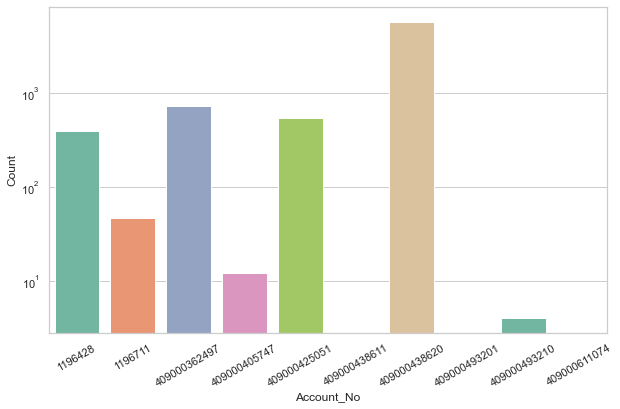

In [53]:
direct = newdf[newdf['E']=='direct']
colum = ['Account_No','Count']
direct1 = pd.DataFrame(columns=colum)
direct1['Count']=[0 for i in range(0,10)]

list2=[int(lis) for lis in list2]
direct1['Account_No']=list2

for k in direct1.index:
    x=direct1.iloc[k,0]
    df3=direct[x==direct['Account No']]
    direct1.iloc[k,1]=len(df3)
    
plt.figure(figsize=(10,6))
g= sns.barplot(y='Count',x='Account_No', data=direct1, palette='Set2')
g.set_yscale('log')
plt.xticks(rotation=30)


In [54]:
colum = ['Account_No','Count']
direct1 = pd.DataFrame(columns=colum)
direct1['Count']=[0 for i in range(0,10)]

In [55]:
list2=[int(lis) for lis in list2]
direct1['Account_No']=list2


In [56]:
for k in direct1.index:
    x=direct1.iloc[k,0]
    df3=direct[x==direct['Account No']]
    direct1.iloc[k,1]=len(df3)
    #print((direct['Account No'][direct.index[0
    #print(type(direct1.iloc[k,1]),type(direct['Account No'][direct.index[0]]),type(direct1.iloc[k,0]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1196428'),
  Text(1, 0, '1196711'),
  Text(2, 0, '409000362497'),
  Text(3, 0, '409000405747'),
  Text(4, 0, '409000425051'),
  Text(5, 0, '409000438611'),
  Text(6, 0, '409000438620'),
  Text(7, 0, '409000493201'),
  Text(8, 0, '409000493210'),
  Text(9, 0, '409000611074')])

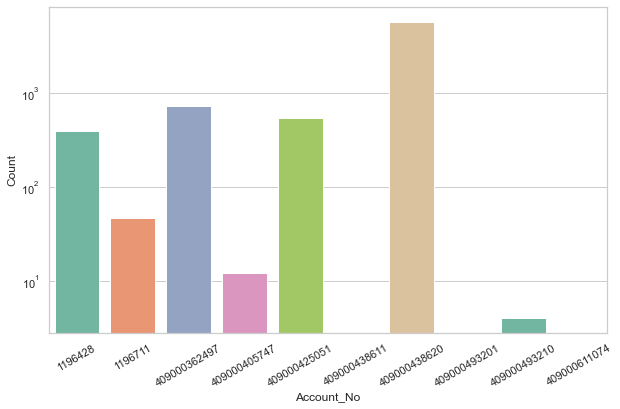

In [57]:
plt.figure(figsize=(10,6))
g= sns.barplot(y='Count',x='Account_No', data=direct1, palette='Set2')
g.set_yscale('log')
plt.xticks(rotation=30)


In [58]:
direct1

,Account_No,Count
0,409000611074,0
1,409000493201,0
2,409000425051,536
3,409000405747,12
4,409000438611,0
5,409000493210,4
6,409000438620,5751
7,1196711,47
8,1196428,389
9,409000362497,719


In [59]:
Total_Mode = pd.DataFrame(columns=lb,index=list2)

In [60]:
def create_summarY():

    def set_values(x):
        for ele in Total_Mode.columns:
            dfk=(newdf[(newdf['B']==ele) & (newdf['Account No'] == int(x))])
            Total_Mode[ele][x]=len(dfk.index)

    for m in Total_Mode.index:
        set_values(m)

In [61]:
for ll in range(0,len(la)):
    create_summarY()   

In [62]:
Total_Mode=Total_Mode.astype({'cashdep':int,'neft':int,
 'imps':int,
 'rtgs':int,
 'electronic':int,
 'aeps':int,
 'nfs':int,
 'chq':int,
 'rupay':int,
 'cash':int,
 'pos':int,
 'visa':int,
 'atm':int,
 'sweep':int,
 'payu':int,
 'csh':int,
 'bbps':int,
 'stl':int,
 'master':int,
 'maestro':int,
 'e-billing':int,
 'online':int,
 'epayment':int})

<AxesSubplot:>

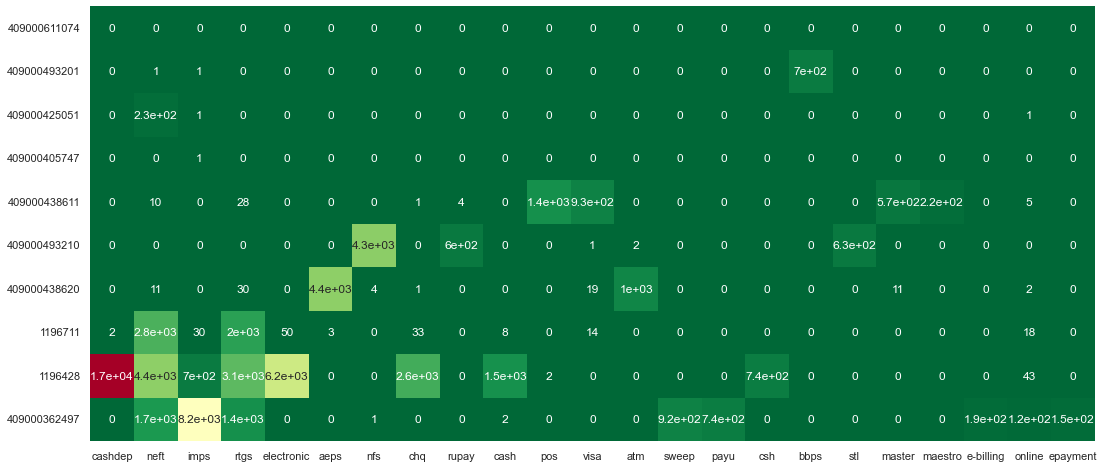

In [63]:
Total_Mode.index
plt.figure(figsize=(18,8))
sns.heatmap(Total_Mode,annot=True,cbar=False,cmap='RdYlGn_r')

In [64]:
Transfer_type = pd.DataFrame(columns=['Type','Count_in_FDRL'])

In [65]:
Transfer_type=Transfer_type.astype({'Type':int,'Count_in_FDRL':int})

In [66]:
#Only for FDRL Bank

In [67]:
df4=newdf[newdf['A']=='fdrl']

In [68]:
df41 = df4[df4['C']=='internal']
df42 = df4[df4['C']=='national']

In [69]:
Transfer_type['Type']=['internal','national']
Transfer_type['Count_in_FDRL']=[len(df41),len(df42)]

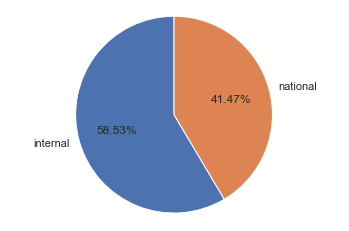

In [70]:
plt.pie(Transfer_type['Count_in_FDRL'],labels=Transfer_type['Type'],startangle=90,autopct="%1.2f%%")
plt.axis('equal')
plt.show()

In [71]:
Transfer_type

,Type,Count_in_FDRL
0,internal,8839
1,national,6262


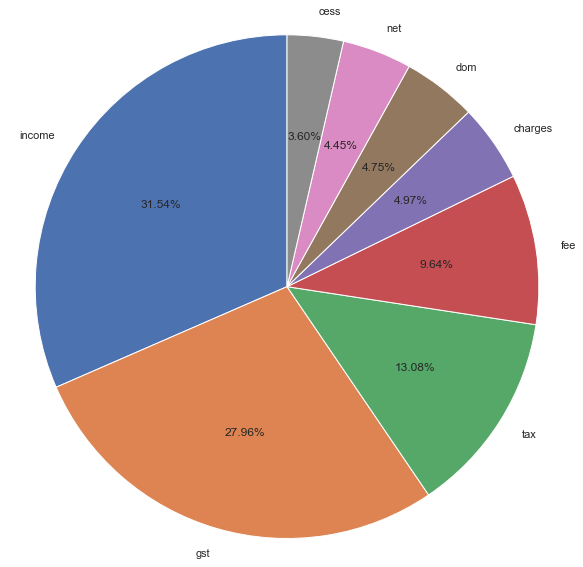

In [72]:
Charges_Type = pd.DataFrame(columns=['Type','Count'])
Charges_Type=Charges_Type.astype({'Type':int,'Count':int})
df50 = newdf[newdf['D']==ld[0]]
df51 = newdf[newdf['D']==ld[1]]
df52 = newdf[newdf['D']==ld[2]]
df53 = newdf[newdf['D']==ld[3]]
df54 = newdf[newdf['D']==ld[4]]
df55 = newdf[newdf['D']==ld[5]]
df56 = newdf[newdf['D']==ld[6]]
df57 = newdf[newdf['D']==ld[7]]
Charges_Type['Type']=ld
Charges_Type['Count']=[len(df50),len(df51),len(df52),len(df53),len(df54),len(df55),len(df56),len(df57)]
plt.figure(figsize=(10,10))
plt.pie(Charges_Type['Count'],labels=Charges_Type['Type'],startangle=90,autopct="%1.2f%%")
plt.axis('equal')
plt.show()

In [74]:
Charges_Type=Charges_Type.astype({'Type':int,'Count':int})

ValueError: invalid literal for int() with base 10: 'income'

In [ ]:
ld

In [702]:
df50 = newdf[newdf['D']==ld[0]]
df51 = newdf[newdf['D']==ld[1]]
df52 = newdf[newdf['D']==ld[2]]
df53 = newdf[newdf['D']==ld[3]]
df54 = newdf[newdf['D']==ld[4]]
df55 = newdf[newdf['D']==ld[5]]
df56 = newdf[newdf['D']==ld[6]]
df57 = newdf[newdf['D']==ld[7]]

In [703]:
Charges_Type['Type']=ld
Charges_Type['Count']=[len(df50),len(df51),len(df52),len(df53),len(df54),len(df55),len(df56),len(df57)]

In [704]:
Charges_Type

,Type,Count
0,income,1155
1,gst,1024
2,tax,479
3,fee,353
4,charges,182
5,dom,174
6,net,163
7,cess,132


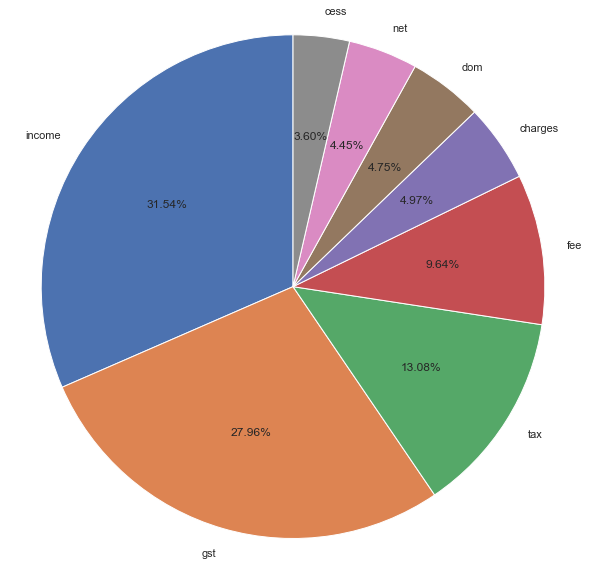

In [707]:
plt.figure(figsize=(10,10))
plt.pie(Charges_Type['Count'],labels=Charges_Type['Type'],startangle=90,autopct="%1.2f%%")
plt.axis('equal')
plt.show()